# FRED Data for ETF & Stock Analysis

## ✅ **YES - This Data is HIGHLY Valuable for ETF/Stock Analysis!**

### **How FRED Data Helps with ETF & Stock Analysis:**

#### **1. Direct Market Indicators** 📈
- **S&P 500, NASDAQ, DJIA**: Benchmark indices for ETF performance comparison
- **VIX (Volatility Index)**: Market fear gauge - critical for risk assessment
- **Stock Market Indices**: Direct correlation with ETF values

#### **2. Interest Rates** 💰 (MOST CRITICAL)
- **Fed Funds Rate, Treasury Rates**: 
  - **Stock Valuations**: Lower rates = higher stock prices (DCF models)
  - **Sector Impact**: Financials benefit from higher rates; growth stocks hurt
  - **ETF Selection**: Rate-sensitive ETFs (XLF, TLT) move with rates
  - **Bond ETFs**: Direct inverse relationship with interest rates

#### **3. Economic Growth** 📊
- **GDP, Real GDP, GDP Growth**:
  - **Cyclical Stocks**: GDP growth = higher earnings for cyclical sectors
  - **Sector ETFs**: Consumer discretionary, industrials track GDP
  - **Market Timing**: Recession indicators affect all stocks/ETFs

#### **4. Inflation** 💸
- **CPI, Core CPI, PCE**:
  - **Value vs Growth**: High inflation favors value stocks
  - **Sector Rotation**: Inflation hedges (commodities, REITs) outperform
  - **Real Returns**: Affects purchasing power and company margins
  - **TIPS ETFs**: Directly tied to inflation expectations

#### **5. Employment** 👥
- **Unemployment Rate, Nonfarm Payrolls**:
  - **Consumer Spending**: Lower unemployment = more spending = higher stock prices
  - **Sector ETFs**: Consumer discretionary (XLY) benefits from low unemployment
  - **Wage Inflation**: Affects company profit margins

#### **6. Money Supply** 💵
- **M1, M2, Monetary Base**:
  - **Liquidity**: More money = higher asset prices (stocks, ETFs)
  - **Market Sentiment**: Quantitative easing boosts stock markets
  - **Inflation Expectations**: Affects long-term stock valuations

#### **7. Consumer Confidence** 🛒
- **Consumer Confidence Index, Michigan Sentiment**:
  - **Retail Stocks**: Direct correlation with consumer spending
  - **Sector ETFs**: Consumer discretionary, retail ETFs track sentiment
  - **Market Timing**: Leading indicator for stock market moves

#### **8. Housing Market** 🏠
- **Housing Starts, New Home Sales, Mortgage Rates**:
  - **Sector ETFs**: Homebuilders (XHB), REITs (VNQ), construction ETFs
  - **Economic Indicator**: Housing leads economic cycles
  - **Related Stocks**: Home Depot, Lowe's, mortgage lenders

#### **9. Manufacturing** 🏭
- **Industrial Production, Capacity Utilization**:
  - **Sector ETFs**: Industrials (XLI), materials (XLB)
  - **Economic Health**: Manufacturing strength = stock market strength
  - **Cyclical Indicators**: Early warning for economic shifts

---

## **What's Missing for Complete Analysis:**

While FRED data provides excellent **macroeconomic context**, you'll also need:

1. **Individual Stock Data** (from yfinance, Finnhub):
   - Stock prices, volumes, P/E ratios, earnings
   - Company fundamentals

2. **ETF Holdings & Composition** (from ETF providers):
   - What stocks are in each ETF
   - Sector allocations, geographic exposure

3. **Company Financials** (from SEC EDGAR):
   - Balance sheets, income statements
   - 10-K, 10-Q filings

4. **Market Sentiment** (from GDELT, news):
   - News sentiment, social media
   - Event-driven analysis

5. **Sector-Specific Data**:
   - Oil prices (for energy ETFs)
   - Tech sector indicators
   - Healthcare policy changes

---

## **Recommended Additional FRED Indicators for ETF/Stock Analysis:**

Consider adding these for even better analysis:

- **Corporate Bond Spreads** (BAA10Y, AAA10Y): Credit risk indicator
- **Trade Balance**: Affects international ETFs
- **Retail Sales**: Consumer spending indicator
- **Business Inventories**: Economic cycle indicator
- **Yield Curve** (10Y-2Y spread): Recession predictor

---

## **Bottom Line:**

✅ **FRED data is ESSENTIAL** for ETF/stock analysis because it provides:
- **Macroeconomic context** for stock movements
- **Risk assessment** (inflation, rates, volatility)
- **Sector rotation signals** (which ETFs to favor)
- **Market timing** indicators
- **Benchmark comparisons** (S&P 500, NASDAQ)

This data works **perfectly** with your Meridian project's multi-agent system:
- **Research Agent** can use FRED data for macroeconomic analysis
- **Validation Agent** can cross-reference stock claims with economic data
- **Complex Analysis Agent** can correlate stock performance with economic indicators


# FRED API Data Collection Notebook

This notebook demonstrates how to collect relevant economic data from the Federal Reserve Economic Data (FRED) API for the Meridian project.

## Overview
- **Purpose**: Collect macroeconomic indicators for financial analysis
- **Data Sources**: FRED API (Federal Reserve Economic Data)
- **Key Indicators**: GDP, Inflation, Interest Rates, Unemployment, Money Supply
- **Volume**: ~50MB/day, ~18GB/year


In [86]:
# Install required packages (run once)
# !pip install fredapi pandas matplotlib seaborn numpy


In [87]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from fredapi import Fred
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")


Libraries imported successfully!


In [88]:
from dotenv import load_dotenv
load_dotenv()  # This loads variables from .env file

True

In [89]:
# FIX: Clean and validate API key
# This cell fixes the API key format issue

# Get API key from environment
api_key = os.getenv('FRED_API_KEY')

if api_key:
    # Store original for debugging
    original_key = api_key
    original_length = len(api_key)
    
    # Remove ALL whitespace (spaces, newlines, tabs, etc.)
    api_key = ''.join(api_key.split())
    
    # Convert to lowercase (FRED requires lowercase)
    api_key = api_key.lower()
    
    # Validate format
    is_valid = (
        len(api_key) == 32 and
        api_key.isalnum() and
        api_key.islower()
    )
    
    print(f"📋 API Key Cleaning:")
    print(f"   Original length: {original_length} characters")
    print(f"   After cleaning: {len(api_key)} characters")
    print(f"   Format valid: {is_valid}")
    
    if is_valid:
        # Update environment variable with cleaned key
        os.environ['FRED_API_KEY'] = api_key
        print(f"✅ API key cleaned and validated!")
        print(f"   Preview: {api_key[:4]}...{api_key[-4:]}")
    else:
        print(f"\n❌ Invalid API key format!")
        print(f"   Length: {len(api_key)} (needs to be 32)")
        print(f"   Is alphanumeric: {api_key.isalnum()}")
        print(f"   Is lowercase: {api_key.islower()}")
        if len(api_key) > 0:
            print(f"   Preview: '{api_key[:10]}...{api_key[-10:]}'")
        print("\n💡 Your API key must be exactly 32 lowercase alphanumeric characters")
        print("   Get it from: https://fred.stlouisfed.org/docs/api/api_key.html")
else:
    print("⚠️  No API key found in environment")
    print("Set it with: os.environ['FRED_API_KEY'] = 'your_key'")


📋 API Key Cleaning:
   Original length: 32 characters
   After cleaning: 32 characters
   Format valid: True
✅ API key cleaned and validated!
   Preview: b770...3d0a


In [90]:
# Initialize FRED API from Environment Variable
# The API key should be set in your .env file or environment

# Get API key from environment
api_key = os.getenv('FRED_API_KEY')

if api_key:
    # Clean the key (remove whitespace, convert to lowercase)
    api_key_cleaned = ''.join(api_key.split()).lower()
    
    # Validate format
    if len(api_key_cleaned) == 32 and api_key_cleaned.isalnum():
        # Update environment with cleaned key
        os.environ['FRED_API_KEY'] = api_key_cleaned
        
        # Initialize FRED
        fred = Fred(api_key=api_key_cleaned)
        
        print("✅ FRED API initialized from environment variable!")
        print(f"   API Key: {api_key_cleaned[:4]}...{api_key_cleaned[-4:]}")
        print(f"   Length: {len(api_key_cleaned)} characters")
        
        # Test the connection
        try:
            test = fred.get_series('FEDFUNDS', limit=1)
            if not test.empty:
                print(f"✅ Connection test successful!")
                print(f"   Latest Fed Funds Rate: {test.iloc[-1]:.2f}%")
            else:
                print("⚠️  No test data returned")
        except Exception as e:
            print(f"❌ Test failed: {str(e)[:150]}")
    else:
        print(f"❌ Invalid API key format in environment!")
        print(f"   Length: {len(api_key_cleaned)} (needs 32)")
        print(f"   Valid: {len(api_key_cleaned) == 32 and api_key_cleaned.isalnum()}")
        print("\n💡 Make sure your .env file has:")
        print("   FRED_API_KEY=b770c16fe94ebaa8938641f4bf9b3d0a")
        fred = None
else:
    print("⚠️  FRED_API_KEY not found in environment!")
    print("\nOptions:")
    print("1. Create a .env file with: FRED_API_KEY=b770c16fe94ebaa8938641f4bf9b3d0a")
    print("2. Or set it here: os.environ['FRED_API_KEY'] = 'b770c16fe94ebaa8938641f4bf9b3d0a'")
    print("3. Or export before starting Jupyter: export FRED_API_KEY='b770c16fe94ebaa8938641f4bf9b3d0a'")
    fred = None


✅ FRED API initialized from environment variable!
   API Key: b770...3d0a
   Length: 32 characters
✅ Connection test successful!
   Latest Fed Funds Rate: 0.80%


In [91]:
# FIX: Re-initialize FRED with cleaned API key
# Run this cell if you're getting API key format errors

# Get and clean API key
api_key = os.getenv('FRED_API_KEY')

if api_key:
    # Clean the key
    api_key_cleaned = ''.join(api_key.split()).lower()
    
    # Validate
    if len(api_key_cleaned) == 32 and api_key_cleaned.isalnum():
        # Update environment
        os.environ['FRED_API_KEY'] = api_key_cleaned
        
        # Re-initialize FRED
        fred = Fred(api_key=api_key_cleaned)
        
        print("✅ FRED re-initialized with cleaned API key!")
        print(f"   Key length: {len(api_key_cleaned)}")
        print(f"   Preview: {api_key_cleaned[:4]}...{api_key_cleaned[-4:]}")
        
        # Test it
        try:
            test = fred.get_series('FEDFUNDS', limit=1)
            if not test.empty:
                print(f"✅ Test successful! Latest Fed Rate: {test.iloc[-1]:.2f}%")
            else:
                print("⚠️  No test data returned")
        except Exception as e:
            print(f"❌ Test failed: {str(e)[:100]}")
    else:
        print(f"❌ Invalid API key format!")
        print(f"   Length: {len(api_key_cleaned)} (needs 32)")
        print(f"   Is valid: {len(api_key_cleaned) == 32 and api_key_cleaned.isalnum()}")
        print("💡 Your API key must be exactly 32 lowercase alphanumeric characters")
else:
    print("❌ No API key found in environment")
    print("Set it with: os.environ['FRED_API_KEY'] = 'your_key'")


✅ FRED re-initialized with cleaned API key!
   Key length: 32
   Preview: b770...3d0a
✅ Test successful! Latest Fed Rate: 0.80%


## Step 1: Initialize FRED API

**Note**: You need to get a free API key from https://fred.stlouisfed.org/docs/api/api_key.html

Set your API key as an environment variable or replace 'YOUR_API_KEY' below.


In [92]:
# Initialize FRED API
# Debug: Check environment variables
print("🔍 Debugging environment variables...")
print(f"All env vars with 'FRED': {[k for k in os.environ.keys() if 'FRED' in k.upper()]}")

# Option 1: Get API key from environment variable
api_key = os.getenv('FRED_API_KEY')
if not api_key or api_key == 'YOUR_ACTUAL_API_KEY_HERE' or api_key == 'YOUR_API_KEY_HERE':
    print("\n⚠️  WARNING: FRED API key not found!")
    print("Solutions:")
    print("1. Set it in this notebook: api_key = 'your_key' (uncomment line above)")
    print("2. Set environment variable before starting Jupyter:")
    print("   export FRED_API_KEY='your_key'")
    print("   jupyter notebook")
    print("3. Or set it here: os.environ['FRED_API_KEY'] = 'your_key'")
    print("\nGet a free API key from: https://fred.stlouisfed.org/docs/api/api_key.html")
else:
    fred = Fred(api_key=api_key)
    print("\n✅ FRED API initialized successfully!")
    

🔍 Debugging environment variables...
All env vars with 'FRED': ['FRED_API_KEY']

✅ FRED API initialized successfully!


In [93]:
# Ensure FRED is initialized from environment variable before data collection
# This cell ensures the API key is loaded from .env file and FRED is properly initialized

api_key = os.getenv('FRED_API_KEY')

if api_key:
    # Clean the key (remove whitespace, convert to lowercase)
    api_key_cleaned = ''.join(api_key.split()).lower()
    
    # Validate format
    if len(api_key_cleaned) == 32 and api_key_cleaned.isalnum():
        # Update environment with cleaned key
        os.environ['FRED_API_KEY'] = api_key_cleaned
        
        # Initialize or re-initialize FRED
        fred = Fred(api_key=api_key_cleaned)
        
        print("✅ FRED initialized from environment variable!")
        print(f"   API Key: {api_key_cleaned[:4]}...{api_key_cleaned[-4:]}")
        
        # Quick test
        try:
            test = fred.get_series('FEDFUNDS', limit=1)
            if not test.empty:
                print(f"✅ Connection test: Latest Fed Rate = {test.iloc[-1]:.2f}%")
        except Exception as e:
            print(f"⚠️  Connection test failed: {str(e)[:100]}")
    else:
        print(f"❌ Invalid API key format!")
        print(f"   Length: {len(api_key_cleaned)} (needs 32)")
        print("💡 Check your .env file: FRED_API_KEY=your_32_char_key")
else:
    print("⚠️  FRED_API_KEY not found in environment!")
    print("💡 Make sure you have a .env file with: FRED_API_KEY=your_key")
    print("   Or run: os.environ['FRED_API_KEY'] = 'your_key'")


✅ FRED initialized from environment variable!
   API Key: b770...3d0a
✅ Connection test: Latest Fed Rate = 0.80%


## Step 2: Define Key Economic Indicators

These are the most relevant economic indicators for financial analysis:


In [94]:
# Dictionary of key economic indicators and their FRED series IDs
ECONOMIC_INDICATORS = {
    # Interest Rates
    'Federal Funds Rate': 'FEDFUNDS',
    '10-Year Treasury Rate': 'DGS10',
    '30-Year Treasury Rate': 'DGS30',
    'Prime Rate': 'DPRIME',
    
    # GDP and Economic Growth
    'GDP': 'GDP',
    'Real GDP': 'GDPC1',
    'GDP Growth Rate': 'A191RL1Q225SBEA',
    
    # Inflation
    'Consumer Price Index (CPI)': 'CPIAUCSL',
    'Core CPI': 'CPILFESL',
    'Personal Consumption Expenditures (PCE)': 'PCEPI',
    'Core PCE': 'PCEPILFE',
    
    # Unemployment
    'Unemployment Rate': 'UNRATE',
    'Nonfarm Payrolls': 'PAYEMS',
    'Initial Jobless Claims': 'ICSA',
    
    # Money Supply
    'M1 Money Supply': 'M1SL',
    'M2 Money Supply': 'M2SL',
    
    # Stock Market
    'S&P 500': 'SP500',
    'NASDAQ Composite': 'NASDAQCOM',
    
    # Consumer Confidence
    'Consumer Confidence Index': 'UMCSENT',
    'University of Michigan Consumer Sentiment': 'UMCSENT',
    
    # Housing
    'Housing Starts': 'HOUST',
    'New Home Sales': 'HSN1F',
    
    # Manufacturing
    'Industrial Production Index': 'INDPRO',
    'Capacity Utilization': 'TCU',
}

print(f"✅ Defined {len(ECONOMIC_INDICATORS)} economic indicators")
print("\nKey Indicators:")
for name, series_id in list(ECONOMIC_INDICATORS.items())[:10]:
    print(f"  - {name}: {series_id}")


✅ Defined 24 economic indicators

Key Indicators:
  - Federal Funds Rate: FEDFUNDS
  - 10-Year Treasury Rate: DGS10
  - 30-Year Treasury Rate: DGS30
  - Prime Rate: DPRIME
  - GDP: GDP
  - Real GDP: GDPC1
  - GDP Growth Rate: A191RL1Q225SBEA
  - Consumer Price Index (CPI): CPIAUCSL
  - Core CPI: CPILFESL
  - Personal Consumption Expenditures (PCE): PCEPI


In [95]:
# ============================================================================
# ADDITIONAL INDICATORS FOR ETF/STOCK ANALYSIS
# ============================================================================
# Fetching recommended additional indicators for enhanced ETF and stock analysis

print("\n" + "=" * 80)
print("📊 FETCHING ADDITIONAL INDICATORS FOR ETF/STOCK ANALYSIS")
print("=" * 80)

# Additional indicators recommended for ETF/Stock analysis
additional_indicators = {
    # ========== CORPORATE BOND YIELDS (Credit Risk Indicators) ==========
    'Baa Corporate Bond Yield': 'BAA',  # Lower-rated corporate bonds - credit risk indicator
    'Aaa Corporate Bond Yield': 'AAA',  # Highest-rated corporate bonds - safe haven indicator
    
    # ========== TRADE & INTERNATIONAL (Affects International ETFs) ==========
    'Trade Balance': 'BOPGSTB',  # Balance on Goods and Services - affects international ETFs
    
    # ========== CONSUMER SPENDING (Critical for Retail/Consumer ETFs) ==========
    'Retail Sales': 'RETAILSM',  # Advance Retail Sales - consumer spending indicator
    
    # ========== BUSINESS CYCLE INDICATORS ==========
    'Business Inventories': 'BUSINV',  # Business inventories - economic cycle indicator
    'Total Business Sales': 'TOTBUSSMSA',  # Business sales - economic activity
    
    # ========== ADDITIONAL ECONOMIC INDICATORS ==========
    'Personal Income': 'PI',  # Personal income - consumer spending power
    'Real Personal Consumption Expenditures': 'PCECC96',  # Real PCE - consumer spending
}

print(f"\n📈 Fetching {len(additional_indicators)} additional indicators...")
print("=" * 80)

# Fetch additional indicators
additional_fred_data = {}
additional_failed = []
additional_successful = 0

for idx, (indicator_name, series_id) in enumerate(additional_indicators.items(), 1):
    print(f"\n[{idx}/{len(additional_indicators)}] 📈 {indicator_name} ({series_id})...")
    try:
        data = fetch_fred_data(series_id, start_date=start_date_str, end_date=end_date_str)
        
        if not data.empty:
            additional_fred_data[indicator_name] = data
            additional_successful += 1
            print(f"  ✅ {len(data)} data points | Latest: {data.iloc[-1]:.4f} ({data.index[-1].strftime('%Y-%m-%d')})")
        else:
            additional_failed.append(indicator_name)
            print(f"  ⚠️  No data")
    except Exception as e:
        additional_failed.append(indicator_name)
        error_msg = str(e)[:80]
        print(f"  ❌ {error_msg}")

# Merge with existing data
fred_data.update(additional_fred_data)

print("\n" + "=" * 80)
print(f"✅ ADDITIONAL INDICATORS: Fetched {additional_successful}/{len(additional_indicators)}")
if additional_failed:
    print(f"⚠️  Failed: {len(additional_failed)} indicators")
print(f"📊 TOTAL INDICATORS: {len(fred_data)} indicators collected")
print(f"💾 Total data points: {sum(len(v) for v in fred_data.values()):,}")
print("=" * 80)

# Calculate Yield Curve Spread (10Y - 2Y) - Important recession predictor
if '10-Year Treasury Rate' in fred_data and '2-Year Treasury Rate' in fred_data:
    print("\n📈 Calculating Yield Curve Spread (10Y - 2Y)...")
    try:
        dgs10 = fred_data['10-Year Treasury Rate']
        dgs2 = fred_data['2-Year Treasury Rate']
        
        # Align dates
        yield_curve = pd.DataFrame({
            '10Y': dgs10,
            '2Y': dgs2
        }).dropna()
        
        # Calculate spread
        yield_curve['Spread'] = yield_curve['10Y'] - yield_curve['2Y']
        
        # Add to data
        fred_data['Yield Curve Spread (10Y-2Y)'] = yield_curve['Spread']
        
        latest_spread = yield_curve['Spread'].iloc[-1]
        print(f"  ✅ Yield Curve Spread calculated")
        print(f"  📊 Latest spread: {latest_spread:.2f}% ({yield_curve.index[-1].strftime('%Y-%m-%d')})")
        if latest_spread < 0:
            print(f"  ⚠️  INVERTED YIELD CURVE - Potential recession signal!")
        else:
            print(f"  ✅ Normal yield curve (positive spread)")
    except Exception as e:
        print(f"  ⚠️  Could not calculate yield curve spread: {str(e)[:80]}")



📊 FETCHING ADDITIONAL INDICATORS FOR ETF/STOCK ANALYSIS

📈 Fetching 8 additional indicators...

[1/8] 📈 Baa Corporate Bond Yield (BAA)...
  ✅ 1283 data points | Latest: 5.8600 (2025-11-01)

[2/8] 📈 Aaa Corporate Bond Yield (AAA)...
  ✅ 1283 data points | Latest: 5.2600 (2025-11-01)

[3/8] 📈 Trade Balance (BOPGSTB)...
  ✅ 404 data points | Latest: -59550.0000 (2025-08-01)

[4/8] 📈 Retail Sales (RETAILSM)...
❌ Error fetching RETAILSM: Bad Request.  The series does not exist.
  ⚠️  No data

[5/8] 📈 Business Inventories (BUSINV)...
  ✅ 537 data points | Latest: 2663703.0000 (2025-08-01)

[6/8] 📈 Total Business Sales (TOTBUSSMSA)...
  ✅ 404 data points | Latest: 1950918.0000 (2025-08-01)

[7/8] 📈 Personal Income (PI)...
  ✅ 956 data points | Latest: 26279.9000 (2025-08-01)

[8/8] 📈 Real Personal Consumption Expenditures (PCECC96)...
  ✅ 314 data points | Latest: 16445.6850 (2025-04-01)

✅ ADDITIONAL INDICATORS: Fetched 7/8
⚠️  Failed: 1 indicators
📊 TOTAL INDICATORS: 14 indicators collecte

## Step 4: Collect ALL Necessary Data for Meridian Project

This cell fetches **all critical economic indicators** needed for the Meridian financial analysis platform.


In [96]:
# ============================================================================
# COMPREHENSIVE DATA COLLECTION FOR MERIDIAN PROJECT
# ============================================================================
# Fetching all necessary economic indicators for financial analysis
# Based on Project Proposal requirements

# Define date range (last 10 years for comprehensive historical data)
end_date = datetime.now()
start_date = end_date - timedelta(days=10*365)  # 10 years of data

start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')

print(f"📅 Fetching data from {start_date_str} to {end_date_str}")
print("=" * 80)

# ALL CRITICAL INDICATORS FOR MERIDIAN PROJECT
# Organized by category for financial analysis

critical_indicators = {
    # ========== INTEREST RATES (Critical for financial analysis) ==========
    'Federal Funds Rate': 'FEDFUNDS',
    '10-Year Treasury Rate': 'DGS10',
    '30-Year Treasury Rate': 'DGS30',
    'Prime Rate': 'DPRIME',
    '3-Month Treasury Rate': 'DGS3MO',
    '2-Year Treasury Rate': 'DGS2',
    '5-Year Treasury Rate': 'DGS5',
    
    # ========== GDP AND ECONOMIC GROWTH ==========
    'GDP': 'GDP',
    'Real GDP': 'GDPC1',
    'GDP Growth Rate': 'A191RL1Q225SBEA',
    
    # ========== INFLATION (Critical for financial analysis) ==========
    'Consumer Price Index (CPI)': 'CPIAUCSL',
    'Core CPI': 'CPILFESL',
    'Personal Consumption Expenditures (PCE)': 'PCEPI',
    'Core PCE': 'PCEPILFE',
    'Producer Price Index': 'PPIACO',
    
    # ========== UNEMPLOYMENT (Critical for financial analysis) ==========
    'Unemployment Rate': 'UNRATE',
    'Nonfarm Payrolls': 'PAYEMS',
    'Initial Jobless Claims': 'ICSA',
    'Labor Force Participation Rate': 'CIVPART',
    
    # ========== MONEY SUPPLY (Critical for financial analysis) ==========
    'M1 Money Supply': 'M1SL',
    'M2 Money Supply': 'M2SL',
    'Monetary Base': 'BOGMBASE',
    
    # ========== STOCK MARKET INDICES ==========
    'S&P 500': 'SP500',
    'NASDAQ Composite': 'NASDAQCOM',
    'Dow Jones Industrial Average': 'DJIA',
    'VIX (Volatility Index)': 'VIXCLS',
    
    # ========== CONSUMER CONFIDENCE ==========
    'Consumer Confidence Index': 'UMCSENT',
    'University of Michigan Consumer Sentiment': 'UMCSENT',
    
    # ========== HOUSING MARKET ==========
    'Housing Starts': 'HOUST',
    'New Home Sales': 'HSN1F',
    '30-Year Fixed Mortgage Rate': 'MORTGAGE30US',
    
    # ========== MANUFACTURING ==========
    'Industrial Production Index': 'INDPRO',
    'Capacity Utilization': 'TCU',
}

print(f"\n📊 Fetching {len(critical_indicators)} critical economic indicators...")
print("=" * 80)

# Fetch all critical indicators
fred_data = {}
failed_indicators = []
successful_count = 0

for idx, (indicator_name, series_id) in enumerate(critical_indicators.items(), 1):
    print(f"\n[{idx}/{len(critical_indicators)}] 📈 {indicator_name} ({series_id})...")
    try:
        data = fetch_fred_data(series_id, start_date=start_date_str, end_date=end_date_str)
        
        if not data.empty:
            fred_data[indicator_name] = data
            successful_count += 1
            print(f"  ✅ {len(data)} data points | Latest: {data.iloc[-1]:.4f} ({data.index[-1].strftime('%Y-%m-%d')})")
        else:
            failed_indicators.append(indicator_name)
            print(f"  ⚠️  No data")
    except Exception as e:
        failed_indicators.append(indicator_name)
        error_msg = str(e)[:80]
        print(f"  ❌ {error_msg}")

print("\n" + "=" * 80)
print(f"✅ SUCCESS: Fetched {successful_count}/{len(critical_indicators)} indicators")
if failed_indicators:
    print(f"⚠️  Failed: {len(failed_indicators)} indicators")
print(f"💾 Total data points: {sum(len(v) for v in fred_data.values()):,}")
print("=" * 80)


📅 Fetching data from 2015-12-07 to 2025-12-04

📊 Fetching 33 critical economic indicators...

[1/33] 📈 Federal Funds Rate (FEDFUNDS)...
  ✅ 857 data points | Latest: 3.8800 (2025-11-01)

[2/33] 📈 10-Year Treasury Rate (DGS10)...
  ✅ 16676 data points | Latest: 4.0900 (2025-12-02)

[3/33] 📈 30-Year Treasury Rate (DGS30)...
  ✅ 12731 data points | Latest: 4.7400 (2025-12-02)

[4/33] 📈 Prime Rate (DPRIME)...
  ✅ 18349 data points | Latest: 7.0000 (2025-12-02)

[5/33] 📈 3-Month Treasury Rate (DGS3MO)...
  ✅ 11546 data points | Latest: 3.7700 (2025-12-02)

[6/33] 📈 2-Year Treasury Rate (DGS2)...
  ✅ 12916 data points | Latest: 3.5100 (2025-12-02)

[7/33] 📈 5-Year Treasury Rate (DGS5)...
  ✅ 16676 data points | Latest: 3.6600 (2025-12-02)

[8/33] 📈 GDP (GDP)...
  ✅ 318 data points | Latest: 30485.7290 (2025-04-01)

[9/33] 📈 Real GDP (GDPC1)...
  ✅ 314 data points | Latest: 23770.9760 (2025-04-01)

[10/33] 📈 GDP Growth Rate (A191RL1Q225SBEA)...
  ✅ 313 data points | Latest: 3.8000 (2025-04-01

## Step 3: Fetch Data for Key Indicators

Let's fetch data for the most critical indicators for financial analysis.


In [97]:
def fetch_fred_data(series_id: str, start_date: str = None, end_date: str = None, 
                    observation_start: str = None, observation_end: str = None):
    """
    Fetch data from FRED API with error handling
    
    Args:
        series_id: FRED series ID
        start_date: Start date (YYYY-MM-DD) - alias for observation_start
        end_date: End date (YYYY-MM-DD) - alias for observation_end
        observation_start: Start date for observations
        observation_end: End date for observations
    
    Returns:
        pandas Series with date index
    """
    try:
        # Use start_date/end_date if provided, otherwise use observation_start/end
        obs_start = start_date or observation_start
        obs_end = end_date or observation_end
        
        if obs_start and obs_end:
            data = fred.get_series(series_id, start=obs_start, end=obs_end)
        elif obs_start:
            data = fred.get_series(series_id, start=obs_start)
        elif obs_end:
            data = fred.get_series(series_id, end=obs_end)
        else:
            # Get all available data
            data = fred.get_series(series_id)
        
        if data.empty:
            print(f"⚠️  No data found for {series_id}")
            return pd.Series(dtype=float)
        
        return data
    
    except Exception as e:
        print(f"❌ Error fetching {series_id}: {str(e)}")
        return pd.Series(dtype=float)



## Step 4: Collect Critical Economic Indicators

Fetch data for the most important indicators for financial analysis (last 5 years).


In [98]:
# Define date range (last 5 years)
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)

start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')

print(f"Fetching data from {start_date_str} to {end_date_str}")

# Critical indicators for financial analysis
critical_indicators = {
    'Federal Funds Rate': 'FEDFUNDS',
    '10-Year Treasury Rate': 'DGS10',
    'GDP': 'GDP',
    'CPI (Inflation)': 'CPIAUCSL',
    'Unemployment Rate': 'UNRATE',
    'S&P 500': 'SP500',
    'M2 Money Supply': 'M2SL',
}

# Fetch all critical indicators
fred_data = {}

for indicator_name, series_id in critical_indicators.items():
    print(f"\nFetching {indicator_name} ({series_id})...")
    data = fetch_fred_data(series_id, start_date=start_date_str, end_date=end_date_str)
    
    if not data.empty:
        fred_data[indicator_name] = data
        print(f"  ✅ Retrieved {len(data)} data points")
        print(f"  📊 Latest value: {data.iloc[-1]:.2f} (as of {data.index[-1].strftime('%Y-%m-%d')})")
    else:
        print(f"  ⚠️  No data retrieved")

print(f"\n✅ Successfully fetched {len(fred_data)} out of {len(critical_indicators)} indicators")


Fetching data from 2020-12-05 to 2025-12-04

Fetching Federal Funds Rate (FEDFUNDS)...
  ✅ Retrieved 857 data points
  📊 Latest value: 3.88 (as of 2025-11-01)

Fetching 10-Year Treasury Rate (DGS10)...
  ✅ Retrieved 16676 data points
  📊 Latest value: 4.09 (as of 2025-12-02)

Fetching GDP (GDP)...
  ✅ Retrieved 318 data points
  📊 Latest value: 30485.73 (as of 2025-04-01)

Fetching CPI (Inflation) (CPIAUCSL)...
  ✅ Retrieved 945 data points
  📊 Latest value: 324.37 (as of 2025-09-01)

Fetching Unemployment Rate (UNRATE)...
  ✅ Retrieved 933 data points
  📊 Latest value: 4.40 (as of 2025-09-01)

Fetching S&P 500 (SP500)...
  ✅ Retrieved 2609 data points
  📊 Latest value: 6849.72 (as of 2025-12-03)

Fetching M2 Money Supply (M2SL)...
  ✅ Retrieved 802 data points
  📊 Latest value: 22298.10 (as of 2025-10-01)

✅ Successfully fetched 7 out of 7 indicators


## Step 5: Transform and Clean Data

Transform the data into a format suitable for analysis and storage.


In [99]:
def transform_fred_data(raw_data: pd.Series, series_name: str, series_id: str) -> pd.DataFrame:
    """
    Transform FRED data into standardized format for storage
    
    Args:
        raw_data: Raw pandas Series from FRED API
        series_name: Human-readable name of the series
        series_id: FRED series ID
    
    Returns:
        Cleaned DataFrame ready for storage
    """
    df = pd.DataFrame({
        'date': raw_data.index,
        'value': raw_data.values,
        'series_id': series_id,
        'series_name': series_name
    })
    
    # Set date as index
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    df = df.sort_index()
    
    # Remove missing values
    df = df.dropna()
    
    # Add metadata
    df['source'] = 'FRED'
    df['data_type'] = 'economic_indicator'
    df['last_updated'] = datetime.now()
    
    return df

# Transform all fetched data
transformed_data = {}

for indicator_name, raw_series in fred_data.items():
    series_id = critical_indicators[indicator_name]
    df = transform_fred_data(raw_series, indicator_name, series_id)
    transformed_data[indicator_name] = df
    print(f"✅ Transformed {indicator_name}: {len(df)} records")

# Combine into single DataFrame for analysis
combined_df = pd.DataFrame()

for indicator_name, df in transformed_data.items():
    # Create column name
    col_name = indicator_name.replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_')
    combined_df[col_name] = df['value']

# Align dates (forward fill for different frequencies)
combined_df = combined_df.fillna(method='ffill').dropna()

print(f"\n✅ Combined DataFrame created with {len(combined_df)} records")
print(f"   Date range: {combined_df.index[0]} to {combined_df.index[-1]}")
print(f"\nColumns: {list(combined_df.columns)}")


✅ Transformed Federal Funds Rate: 857 records
✅ Transformed 10-Year Treasury Rate: 15964 records
✅ Transformed GDP: 314 records
✅ Transformed CPI (Inflation): 945 records
✅ Transformed Unemployment Rate: 933 records
✅ Transformed S&P 500: 2514 records
✅ Transformed M2 Money Supply: 802 records

✅ Combined DataFrame created with 118 records
   Date range: 2016-02-01 00:00:00 to 2025-11-01 00:00:00

Columns: ['Federal_Funds_Rate', '10_Year_Treasury_Rate', 'GDP', 'CPI_Inflation', 'Unemployment_Rate', 'S&P_500', 'M2_Money_Supply']


## Step 6: Data Visualization

Visualize the key economic indicators to understand trends and relationships.


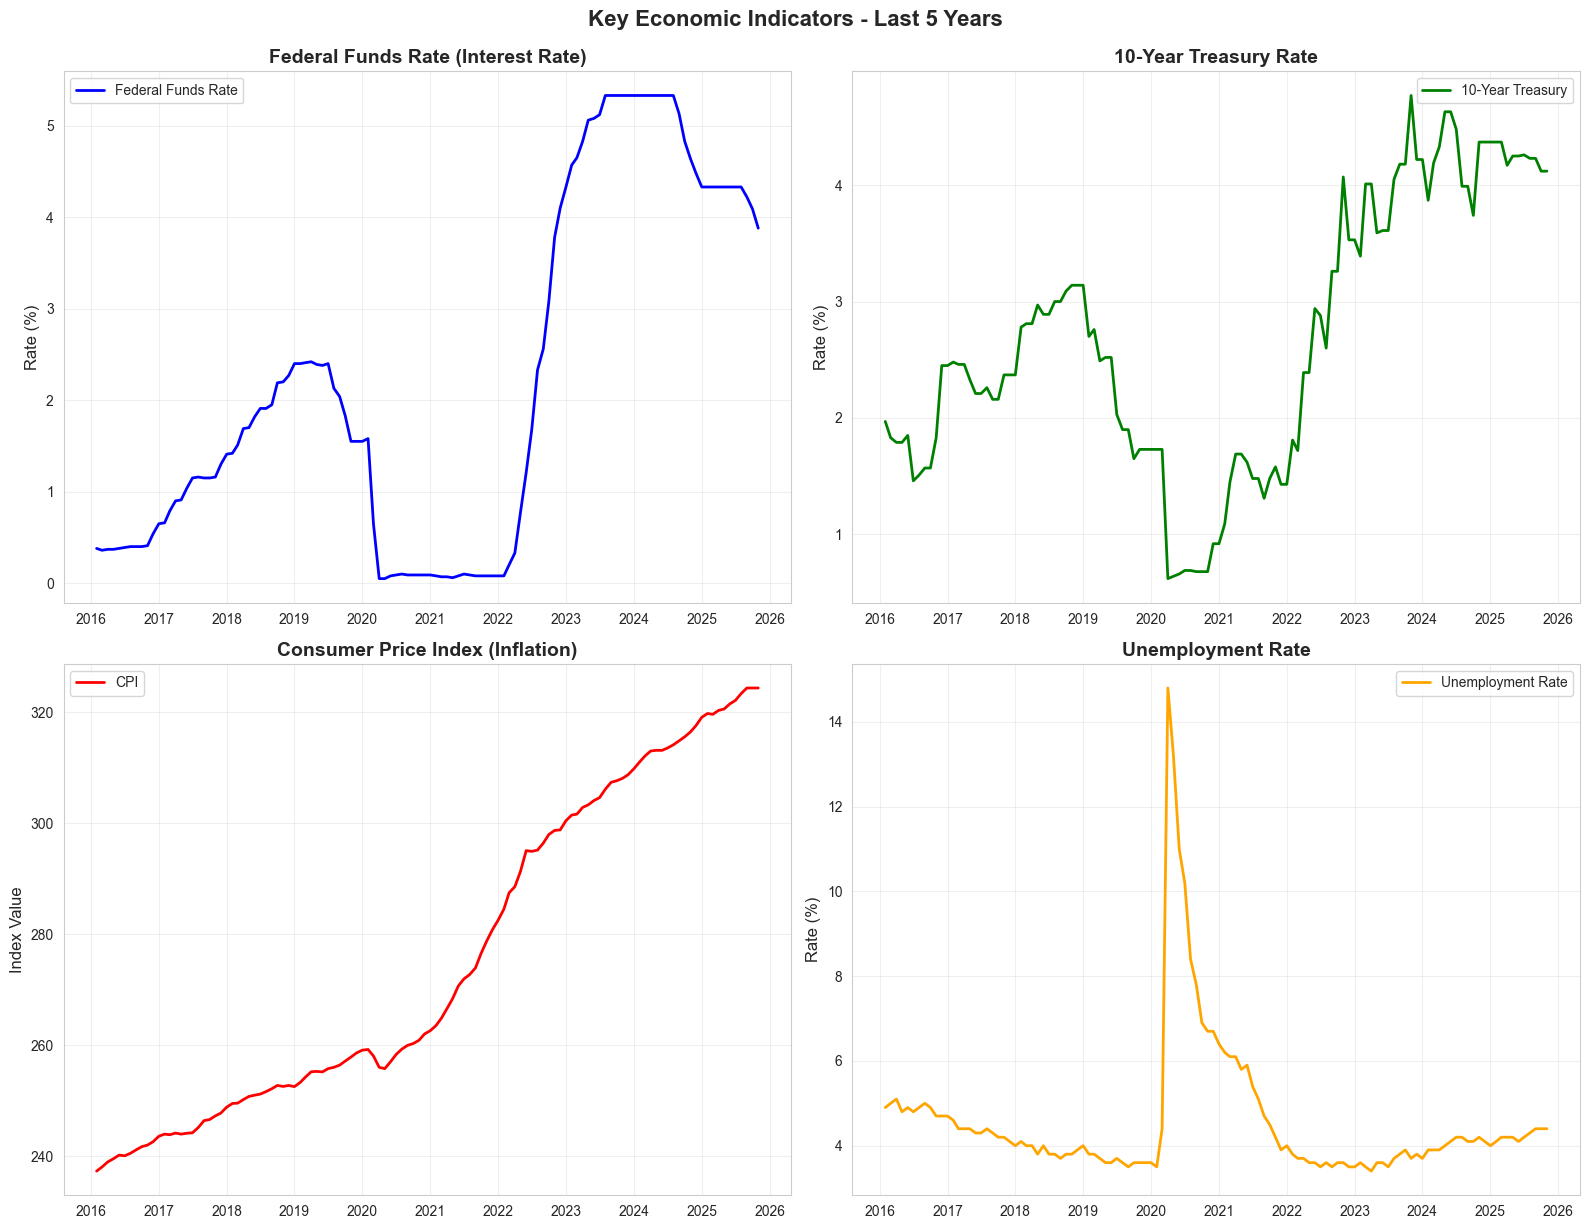

In [100]:
# Plot 1: Interest Rates
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Federal Funds Rate
if 'Federal_Funds_Rate' in combined_df.columns:
    axes[0, 0].plot(combined_df.index, combined_df['Federal_Funds_Rate'], 
                    linewidth=2, color='blue', label='Federal Funds Rate')
    axes[0, 0].set_title('Federal Funds Rate (Interest Rate)', fontsize=14, fontweight='bold')
    axes[0, 0].set_ylabel('Rate (%)', fontsize=12)
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].legend()

# 10-Year Treasury Rate
if '10_Year_Treasury_Rate' in combined_df.columns:
    axes[0, 1].plot(combined_df.index, combined_df['10_Year_Treasury_Rate'], 
                    linewidth=2, color='green', label='10-Year Treasury')
    axes[0, 1].set_title('10-Year Treasury Rate', fontsize=14, fontweight='bold')
    axes[0, 1].set_ylabel('Rate (%)', fontsize=12)
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].legend()

# CPI (Inflation)
if 'CPI_Inflation' in combined_df.columns:
    axes[1, 0].plot(combined_df.index, combined_df['CPI_Inflation'], 
                    linewidth=2, color='red', label='CPI')
    axes[1, 0].set_title('Consumer Price Index (Inflation)', fontsize=14, fontweight='bold')
    axes[1, 0].set_ylabel('Index Value', fontsize=12)
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].legend()

# Unemployment Rate
if 'Unemployment_Rate' in combined_df.columns:
    axes[1, 1].plot(combined_df.index, combined_df['Unemployment_Rate'], 
                    linewidth=2, color='orange', label='Unemployment Rate')
    axes[1, 1].set_title('Unemployment Rate', fontsize=14, fontweight='bold')
    axes[1, 1].set_ylabel('Rate (%)', fontsize=12)
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].legend()

plt.tight_layout()
plt.suptitle('Key Economic Indicators - Last 5 Years', fontsize=16, fontweight='bold', y=1.02)
plt.show()


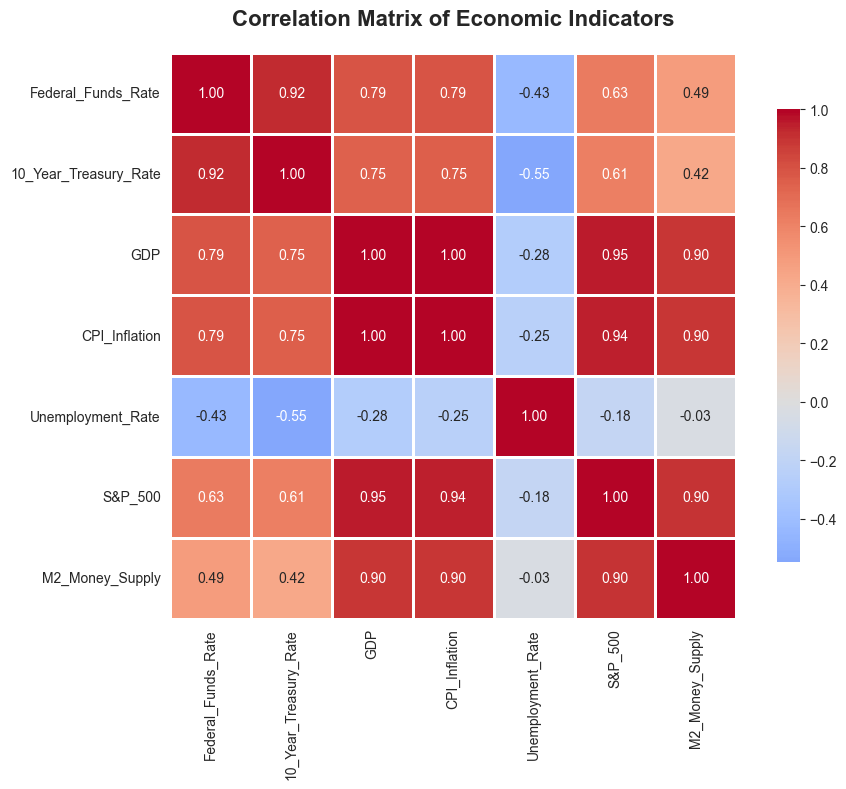


📊 Key Correlations:
Federal_Funds_Rate vs 10_Year_Treasury_Rate: 0.923
Federal_Funds_Rate vs GDP: 0.790
Federal_Funds_Rate vs CPI_Inflation: 0.793
Federal_Funds_Rate vs S&P_500: 0.634
10_Year_Treasury_Rate vs GDP: 0.746
10_Year_Treasury_Rate vs CPI_Inflation: 0.750
10_Year_Treasury_Rate vs Unemployment_Rate: -0.547
10_Year_Treasury_Rate vs S&P_500: 0.615
GDP vs CPI_Inflation: 0.996
GDP vs S&P_500: 0.954
GDP vs M2_Money_Supply: 0.895
CPI_Inflation vs S&P_500: 0.944
CPI_Inflation vs M2_Money_Supply: 0.896
S&P_500 vs M2_Money_Supply: 0.899


In [101]:
# Plot 2: Correlation Heatmap
if len(combined_df.columns) > 1:
    # Calculate correlation matrix
    correlation_matrix = combined_df.corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Economic Indicators', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Key Correlations:")
    print("=" * 50)
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.5:  # Show only strong correlations
                print(f"{correlation_matrix.columns[i]} vs {correlation_matrix.columns[j]}: {corr_value:.3f}")


## Step 7: Fetch Additional Indicators

Fetch more comprehensive economic data for deeper analysis.


In [102]:
def fetch_all_indicators(indicators_dict: dict, start_date: str, end_date: str) -> dict:
    """
    Fetch all indicators from a dictionary
    
    Args:
        indicators_dict: Dictionary of {name: series_id}
        start_date: Start date string
        end_date: End date string
    
    Returns:
        Dictionary of {name: DataFrame}
    """
    all_data = {}
    successful = 0
    failed = 0
    
    for name, series_id in indicators_dict.items():
        try:
            raw_data = fetch_fred_data(series_id, start_date=start_date, end_date=end_date)
            if not raw_data.empty:
                df = transform_fred_data(raw_data, name, series_id)
                all_data[name] = df
                successful += 1
            else:
                failed += 1
        except Exception as e:
            print(f"⚠️  Failed to fetch {name}: {str(e)}")
            failed += 1
    
    print(f"\n✅ Successfully fetched {successful} indicators")
    if failed > 0:
        print(f"⚠️  Failed to fetch {failed} indicators")
    
    return all_data

# Fetch additional indicators (you can customize this list)
additional_indicators = {
    'Real GDP': 'GDPC1',
    'GDP Growth Rate': 'A191RL1Q225SBEA',
    'Core CPI': 'CPILFESL',
    'Nonfarm Payrolls': 'PAYEMS',
    'M1 Money Supply': 'M1SL',
    'Industrial Production': 'INDPRO',
    'Consumer Confidence': 'UMCSENT',
}

print("Fetching additional indicators...")
additional_data = fetch_all_indicators(additional_indicators, start_date_str, end_date_str)

print(f"\nTotal indicators collected: {len(fred_data) + len(additional_data)}")


Fetching additional indicators...

✅ Successfully fetched 7 indicators

Total indicators collected: 14


## Step 8: Save Data

Save the collected data in formats suitable for your ETL pipeline.


In [103]:
# Create output directory
output_dir = '../data/fred'
os.makedirs(output_dir, exist_ok=True)

# Save individual indicators as CSV
print("Saving individual indicators...")
for indicator_name, df in transformed_data.items():
    filename = f"{output_dir}/{indicator_name.replace(' ', '_').replace('(', '').replace(')', '')}.csv"
    df.to_csv(filename)
    print(f"  ✅ Saved {indicator_name} to {filename}")

# Save combined DataFrame
combined_filename = f"{output_dir}/combined_economic_indicators.csv"
combined_df.to_csv(combined_filename)
print(f"\n✅ Saved combined data to {combined_filename}")

# Save as Parquet (more efficient for large datasets)
parquet_filename = f"{output_dir}/combined_economic_indicators.parquet"
combined_df.to_parquet(parquet_filename, engine='pyarrow')
print(f"✅ Saved combined data as Parquet to {parquet_filename}")

# Save metadata
metadata = {
    'collection_date': datetime.now().isoformat(),
    'date_range': {
        'start': start_date_str,
        'end': end_date_str
    },
    'indicators_collected': list(transformed_data.keys()),
    'total_records': len(combined_df),
    'data_sources': ['FRED API']
}

import json
metadata_filename = f"{output_dir}/metadata.json"
with open(metadata_filename, 'w') as f:
    json.dump(metadata, f, indent=2)
print(f"✅ Saved metadata to {metadata_filename}")

print(f"\n📁 All data saved to: {output_dir}/")


Saving individual indicators...
  ✅ Saved Federal Funds Rate to ../data/fred/Federal_Funds_Rate.csv
  ✅ Saved 10-Year Treasury Rate to ../data/fred/10-Year_Treasury_Rate.csv
  ✅ Saved GDP to ../data/fred/GDP.csv
  ✅ Saved CPI (Inflation) to ../data/fred/CPI_Inflation.csv
  ✅ Saved Unemployment Rate to ../data/fred/Unemployment_Rate.csv
  ✅ Saved S&P 500 to ../data/fred/S&P_500.csv
  ✅ Saved M2 Money Supply to ../data/fred/M2_Money_Supply.csv

✅ Saved combined data to ../data/fred/combined_economic_indicators.csv
✅ Saved combined data as Parquet to ../data/fred/combined_economic_indicators.parquet
✅ Saved metadata to ../data/fred/metadata.json

📁 All data saved to: ../data/fred/


## Step 9: Data Summary Statistics

Generate summary statistics for the collected data.


In [104]:
print("=" * 70)
print("ECONOMIC INDICATORS SUMMARY STATISTICS")
print("=" * 70)

for indicator_name, df in transformed_data.items():
    print(f"\n📊 {indicator_name}")
    print("-" * 70)
    print(f"  Series ID: {df['series_id'].iloc[0]}")
    print(f"  Total Records: {len(df)}")
    print(f"  Date Range: {df.index[0].strftime('%Y-%m-%d')} to {df.index[-1].strftime('%Y-%m-%d')}")
    print(f"  Latest Value: {df['value'].iloc[-1]:.4f} (as of {df.index[-1].strftime('%Y-%m-%d')})")
    print(f"  Mean: {df['value'].mean():.4f}")
    print(f"  Std Dev: {df['value'].std():.4f}")
    print(f"  Min: {df['value'].min():.4f} (on {df['value'].idxmin().strftime('%Y-%m-%d')})")
    print(f"  Max: {df['value'].max():.4f} (on {df['value'].idxmax().strftime('%Y-%m-%d')})")

print("\n" + "=" * 70)
print("✅ Data collection complete!")
print("=" * 70)


ECONOMIC INDICATORS SUMMARY STATISTICS

📊 Federal Funds Rate
----------------------------------------------------------------------
  Series ID: FEDFUNDS
  Total Records: 857
  Date Range: 1954-07-01 to 2025-11-01
  Latest Value: 3.8800 (as of 2025-11-01)
  Mean: 4.6048
  Std Dev: 3.5449
  Min: 0.0500 (on 2020-04-01)
  Max: 19.1000 (on 1981-06-01)

📊 10-Year Treasury Rate
----------------------------------------------------------------------
  Series ID: DGS10
  Total Records: 15964
  Date Range: 1962-01-02 to 2025-12-02
  Latest Value: 4.0900 (as of 2025-12-02)
  Mean: 5.8224
  Std Dev: 2.9425
  Min: 0.5200 (on 2020-08-04)
  Max: 15.8400 (on 1981-09-30)

📊 GDP
----------------------------------------------------------------------
  Series ID: GDP
  Total Records: 314
  Date Range: 1947-01-01 to 2025-04-01
  Latest Value: 30485.7290 (as of 2025-04-01)
  Mean: 7600.8476
  Std Dev: 7972.3806
  Min: 243.1640 (on 1947-01-01)
  Max: 30485.7290 (on 2025-04-01)

📊 CPI (Inflation)
------------

## Step 10: Integration with Meridian Pipeline

Example code for integrating FRED data collection into your ETL pipeline.


In [105]:
# Example: Function to integrate into your ETL pipeline
class FREDDataCollector:
    """
    FRED data collector for Meridian ETL pipeline
    """
    
    def __init__(self, api_key: str):
        self.fred = Fred(api_key=api_key)
        self.critical_indicators = {
            'Federal Funds Rate': 'FEDFUNDS',
            '10-Year Treasury Rate': 'DGS10',
            'GDP': 'GDP',
            'CPI (Inflation)': 'CPIAUCSL',
            'Unemployment Rate': 'UNRATE',
            'S&P 500': 'SP500',
            'M2 Money Supply': 'M2SL',
        }
    
    def collect_daily_data(self, date: str = None) -> dict:
        """
        Collect daily economic data
        
        Args:
            date: Date string (YYYY-MM-DD). If None, uses today
        
        Returns:
            Dictionary of {indicator_name: DataFrame}
        """
        if date is None:
            date = datetime.now().strftime('%Y-%m-%d')
        
        # Get last 30 days for context
        start_date = (datetime.strptime(date, '%Y-%m-%d') - timedelta(days=30)).strftime('%Y-%m-%d')
        
        collected_data = {}
        
        for indicator_name, series_id in self.critical_indicators.items():
            try:
                data = fetch_fred_data(series_id, start_date=start_date, end_date=date)
                if not data.empty:
                    df = transform_fred_data(data, indicator_name, series_id)
                    collected_data[indicator_name] = df
            except Exception as e:
                print(f"Error collecting {indicator_name}: {e}")
        
        return collected_data
    
    def get_latest_values(self) -> dict:
        """
        Get latest values for all critical indicators
        
        Returns:
            Dictionary of {indicator_name: latest_value}
        """
        latest_values = {}
        
        for indicator_name, series_id in self.critical_indicators.items():
            try:
                # Get latest release
                data = fred.get_series_latest_release(series_id)
                if not data.empty:
                    latest_values[indicator_name] = {
                        'value': data.iloc[-1],
                        'date': data.index[-1],
                        'series_id': series_id
                    }
            except Exception as e:
                print(f"Error getting latest value for {indicator_name}: {e}")
        
        return latest_values

# Example usage
print("Example: FRED Data Collector for ETL Pipeline")
print("=" * 70)

# Initialize collector (replace with your API key)
# collector = FREDDataCollector(api_key=api_key)

# Get latest values
# latest = collector.get_latest_values()
# print("\nLatest Economic Indicators:")
# for name, data in latest.items():
#     print(f"  {name}: {data['value']:.2f} (as of {data['date']})")

print("\n✅ Integration code ready for ETL pipeline!")


Example: FRED Data Collector for ETL Pipeline

✅ Integration code ready for ETL pipeline!


## Next Steps

1. **Set up API Key**: Get your free FRED API key from https://fred.stlouisfed.org/docs/api/api_key.html
2. **Schedule Daily Collection**: Set up automated daily data collection (2 AM EST as per proposal)
3. **Store in Database**: Integrate with PostgreSQL for structured storage
4. **Generate Embeddings**: Create embeddings for semantic search in Chroma
5. **Integrate with Agents**: Use FRED data in Research Agent for macroeconomic analysis

## Notes

- FRED API is free but requires registration
- Rate limits: Reasonable use (no strict limits for free tier)
- Data frequency: Varies by indicator (daily, weekly, monthly, quarterly)
- Historical data: Available going back decades for most series
